In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import script as sc
import numpy as np
import cv2

CORTE_VERTICAL = 6
CORTE_HORIZONTAL = 6
MAX_K = 30

c:\ferramentass\Python3.9\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\ferramentass\Python3.9\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
c:\ferramentass\Python3.9\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
dic = sc.generateDic(CORTE_VERTICAL, CORTE_HORIZONTAL)

In [3]:
dataHuTreino, dataPixelsTreino = sc.generateDataframe(dic)
dataHuTeste, dataPixelsTeste = sc.generateDataframe(dic, False)

dataHuTreino['Classe'] = dataHuTreino['Classe'].astype('int')
dataHuTeste['Classe'] = dataHuTeste['Classe'].astype('int')

dataPixelsTreino['Classe'] = dataPixelsTreino['Classe'].astype('int')
dataPixelsTeste['Classe'] = dataPixelsTeste['Classe'].astype('int')

In [4]:
X_train, y_train = sc.returnTrainTest(dataHuTreino)
X_teste, y_teste = sc.returnTrainTest(dataHuTeste)

In [5]:
scoresHu, range_k = sc.runKnn(MAX_K, X_train, y_train, X_teste, y_teste)
scoresHu

{1: 0.984,
 2: 0.982,
 3: 0.981,
 4: 0.984,
 5: 0.984,
 6: 0.983,
 7: 0.981,
 8: 0.982,
 9: 0.983,
 10: 0.981,
 11: 0.98,
 12: 0.98,
 13: 0.979,
 14: 0.979,
 15: 0.979,
 16: 0.979,
 17: 0.978,
 18: 0.978,
 19: 0.977,
 20: 0.977,
 21: 0.977,
 22: 0.977,
 23: 0.976,
 24: 0.976,
 25: 0.975,
 26: 0.976,
 27: 0.975,
 28: 0.975,
 29: 0.976}

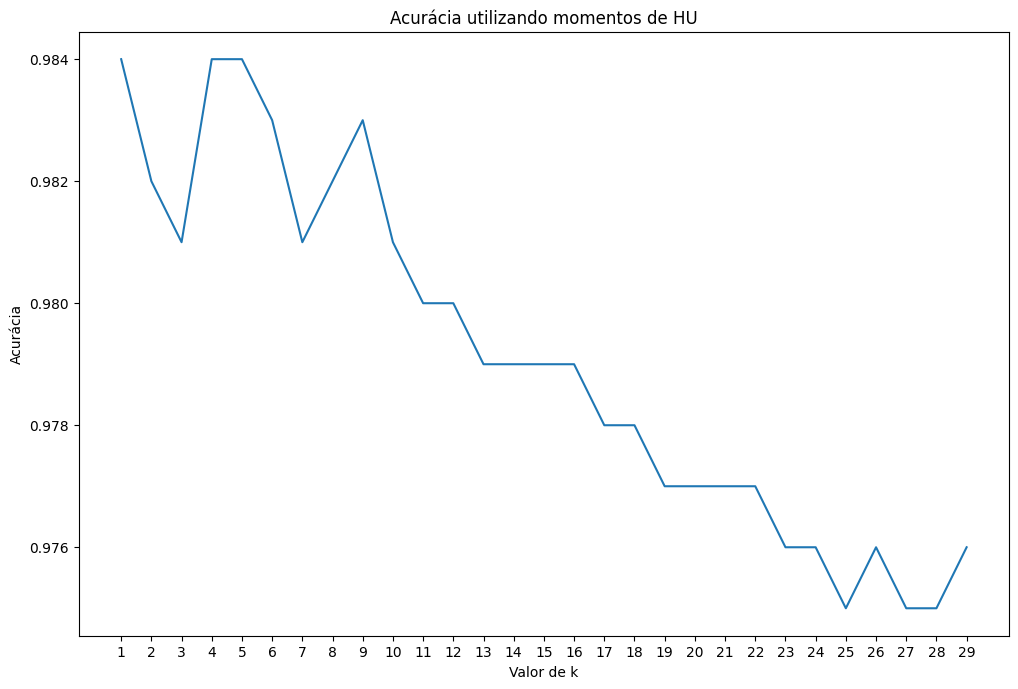

In [6]:
plt.figure(figsize=(12, 8), dpi=100)
plt.xticks(range_k)
plt.plot(range_k, list(scoresHu.values()))
plt.title('Acurácia utilizando momentos de HU')
plt.xlabel('Valor de k')
plt.ylabel('Acurácia')
plt.savefig('result/plot_momentos_hu.png')

In [7]:
cols = np.arange(0, (CORTE_VERTICAL * CORTE_HORIZONTAL), 1)

X_train = dataPixelsTreino[cols].values
y_train = dataPixelsTreino['Classe'].values

X_teste = dataPixelsTeste[cols].values
y_teste = dataPixelsTeste['Classe'].values

In [8]:
scoresPixels, range_k = sc.runKnn(MAX_K, X_train, y_train, X_teste, y_teste)
scoresPixels

{1: 0.99,
 2: 0.987,
 3: 0.988,
 4: 0.986,
 5: 0.985,
 6: 0.984,
 7: 0.984,
 8: 0.983,
 9: 0.983,
 10: 0.983,
 11: 0.984,
 12: 0.984,
 13: 0.983,
 14: 0.984,
 15: 0.982,
 16: 0.983,
 17: 0.983,
 18: 0.982,
 19: 0.982,
 20: 0.982,
 21: 0.982,
 22: 0.982,
 23: 0.982,
 24: 0.982,
 25: 0.982,
 26: 0.982,
 27: 0.981,
 28: 0.981,
 29: 0.98}

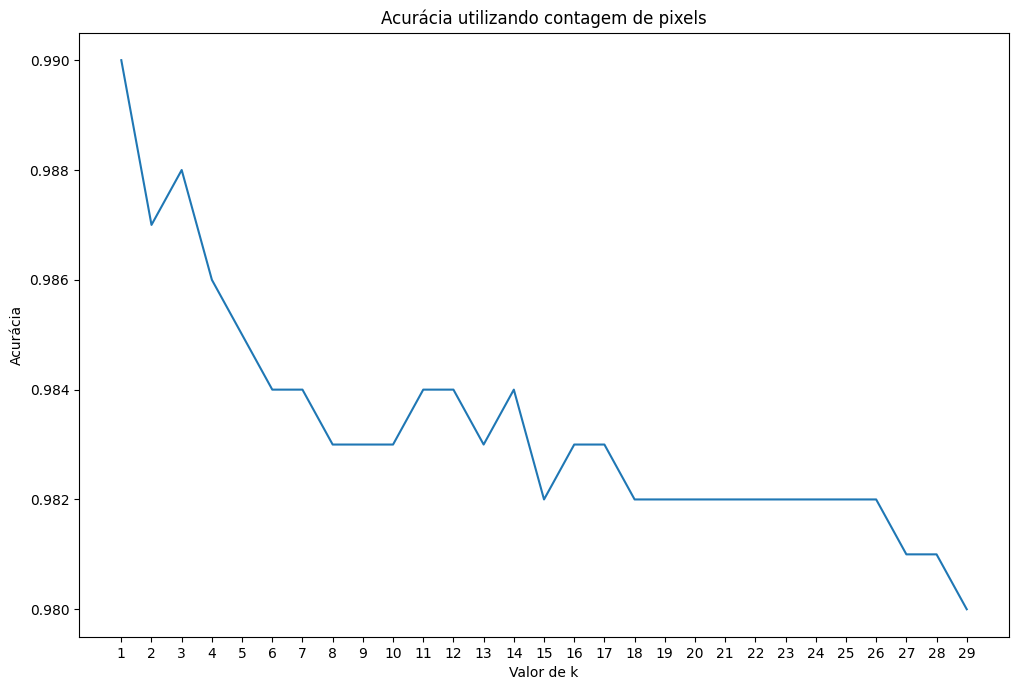

In [9]:
plt.figure(figsize=(12, 8), dpi=100)
plt.xticks(range_k)
plt.plot(range_k, list(scoresPixels.values()))
plt.title('Acurácia utilizando contagem de pixels')
plt.xlabel('Valor de k')
plt.ylabel('Acurácia')
plt.savefig('result/plot_pixels.png')